In [50]:
# YahooFinance
import yfinance as yf
symbol = 'META'

df = yf.download(symbol, period="max", interval="1d")
df.to_csv("META.csv")

[*********************100%***********************]  1 of 1 completed


In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

meta = pd.read_csv("META.csv")
meta = meta[2:]
meta = meta.reset_index()
meta = meta.drop(columns=["index"])
# Rename 'Date' column in meta to 'Price', the original column name in the CSV.
meta = meta.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
meta.head()

meta[columns_to_convert] = meta[columns_to_convert].astype(float)
meta['Date'] = pd.to_datetime(meta['Date']) # Convert the 'Date' column to datetime
meta['Volume'] = meta['Volume'].astype(int)
# meta.head() # Uncomment to check the DataFrame structure

df = meta
# Now you can filter using the 'Date' column:
df = df[df['Date']>=pd.Timestamp(2020,1,1)].reset_index().drop(columns=["index"]) # Use pd.Timestamp
df = df[df['Date']<pd.Timestamp(2025,1,31)] # Use pd.Timestamp

In [52]:
meta.tail(5)

,Date,Close,High,Low,Open,Volume
3236,2025-04-02,583.929993,592.659973,573.359985,574.909973,13470800
3237,2025-04-03,531.619995,552.559998,530.299988,546.219971,34777500
3238,2025-04-04,504.730011,518.000000,494.200012,506.619995,38589800
3239,2025-04-07,516.250000,539.369995,481.899994,485.100006,36074700
3240,2025-04-08,539.109985,547.429993,537.969971,543.250000,8575456


In [53]:
# Perform ADF Test
result = adfuller(df['Close'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If p-value > 0.05, the data is non-stationary → Apply differencing

ADF Statistic: 0.9697784444378315
p-value: 0.9939366166552362


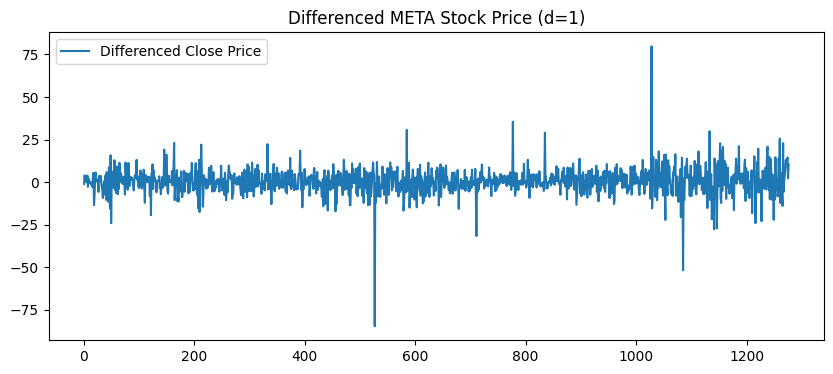

In [54]:
df['Close_diff'] = df['Close'].diff().dropna()

# Plot differenced series
plt.figure(figsize=(10, 4))
plt.plot(df['Close_diff'], label="Differenced Close Price")
plt.title("Differenced META Stock Price (d=1)")
plt.legend()
plt.show()

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf

Significant lags for MA component (q) in ARIMAX: []


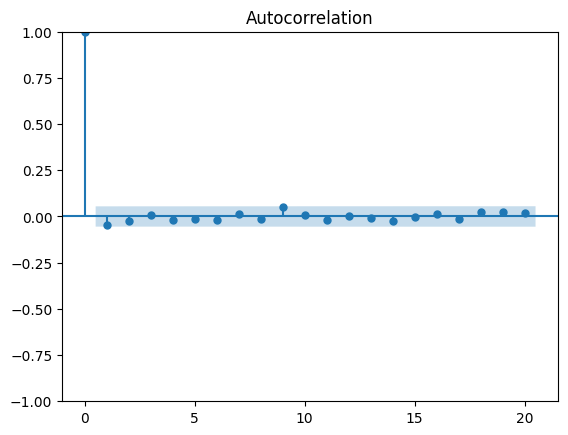

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import numpy as np

# Calculate ACF values with confidence intervals
acf_values, confint = acf(df['Close_diff'].dropna(), nlags=20, alpha=0.05)

# Compute upper and lower confidence intervals
lower_bound, upper_bound = confint[:, 0], confint[:, 1]

# Find significant lags based on confidence intervals
significant_lags = [lag for lag, value in enumerate(acf_values) if lag > 0 and (value < lower_bound[lag] or value > upper_bound[lag])]

print(f"Significant lags for MA component (q) in ARIMAX: {significant_lags}")

# Plot ACF for visualization
plot_acf(df['Close_diff'].dropna(), lags=20, alpha=0.05)
plt.show()

so p =9

Significant lags for AR component (p) in ARIMAX: []


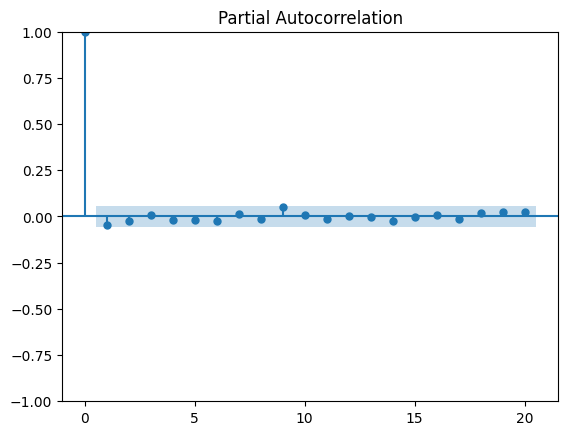

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

# Calculate PACF values with confidence intervals
pacf_values, confint = pacf(df['Close_diff'].dropna(), nlags=20, alpha=0.05, method="ywm")

# Compute upper and lower confidence intervals
lower_bound, upper_bound = confint[:, 0], confint[:, 1]

# Find significant lags based on confidence intervals
significant_lags = [lag for lag, value in enumerate(pacf_values) if lag > 0 and (value < lower_bound[lag] or value > upper_bound[lag])]

print(f"Significant lags for AR component (p) in ARIMAX: {significant_lags}")

# Plot PACF for visualization
plot_pacf(df['Close_diff'].dropna(), lags=20, alpha=0.05, method="ywm")
plt.show()

In [58]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close_diff'].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The series is stationary (p < 0.05). No need for differencing.")
else:
    print("The series is NOT stationary. Consider further differencing.")


ADF Statistic: -37.303392415534255
p-value: 0.0
The series is stationary (p < 0.05). No need for differencing.


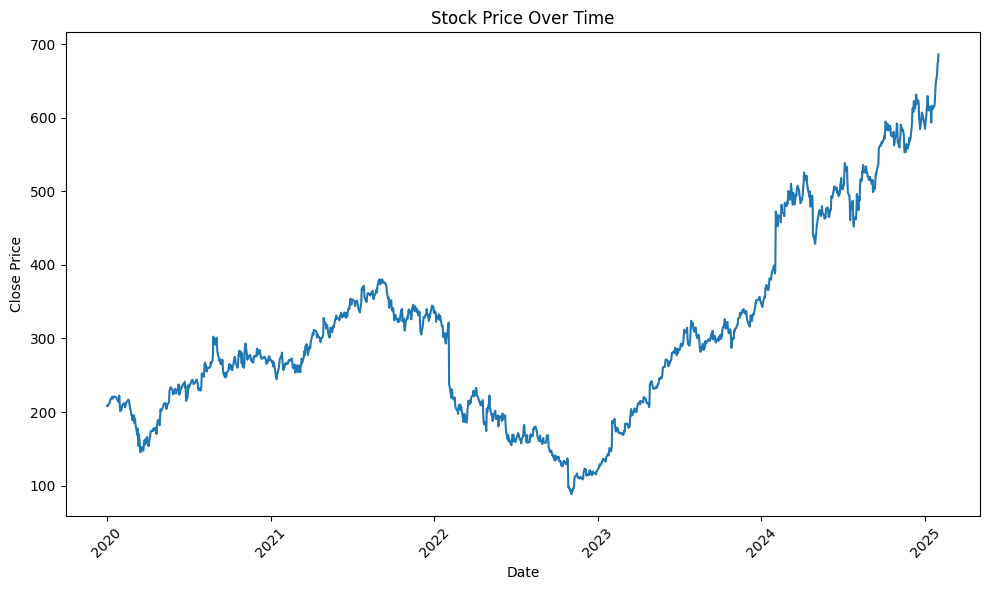

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])  # Plot with 'Date' as the x-axis
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Price Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#Exogenous Variables for Meta:
For Meta’s stock price prediction,select the following exogenous variables:

**Interest rates:** Represents broader economic conditions that can influence the advertising budgets of businesses.

**S&P 500:** Captures the overall market sentiment and Meta’s relative performance.

**Advertising spending:** Directly impacts Meta’s revenue, especially from advertising.

**GDP Growth:** Reflects the economic environment that could affect Meta’s user base and ad revenue.

**User growth metrics:** Influences future revenue, as more users mean higher potential ad revenue.

In [60]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Close_diff'], dtype='object')

In [61]:
pip install yfinance pandas_datareader requests

In [62]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np

# Define the time period for the data
start_date = '2020-01-01'
end_date = '2025-03-31'

# 1. **S&P 500** Data
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
sp500 = sp500[['Close']].rename(columns={'Close': 'SP500'})
sp500 = sp500.resample('D').ffill()  # Resample to daily frequency and forward fill

# 2. **Interest Rate** Data (US Federal Reserve Federal Funds Rate)
interest_rate = web.DataReader('FEDFUNDS', 'fred', start_date, end_date)
interest_rate = interest_rate.rename(columns={'FEDFUNDS': 'Interest_Rate'})
interest_rate = interest_rate.resample('D').ffill()  # Resample to daily frequency and forward fill

# 3. **Advertising Spending** Data (Assume we are using a hypothetical dataset or API)
# For demonstration, we'll generate random data (you should replace it with actual data).
dates = pd.date_range(start=start_date, end=end_date, freq='D')
advertising_spending = pd.DataFrame({
    'Advertising_Spending': np.random.uniform(1000, 5000, size=len(dates))
}, index=dates)

# 4. **GDP Growth** Data (US GDP growth rate from FRED)
gdp_growth = web.DataReader('A191RL1Q225SBEA', 'fred', start_date, end_date)  # US GDP growth rate
gdp_growth = gdp_growth.rename(columns={'A191RL1Q225SBEA': 'GDP_Growth'})
gdp_growth = gdp_growth.resample('D').ffill()  # Resample to daily frequency and forward fill

# 5. **User Growth** Data (Assume we are using Meta's (Facebook) growth data)
# For demonstration, we’ll generate random user growth data (replace with actual data).
user_growth = pd.DataFrame({
    'User_Growth': np.random.uniform(1_000_000, 3_000_000, size=len(dates))
}, index=dates)

# Merge all external data sources into a single DataFrame
external_data = sp500.join([interest_rate, advertising_spending, gdp_growth, user_growth], how='left')

# Verify the data
print(external_data.head())

# Save the merged data to a CSV (optional)
external_data.to_csv('external_data.csv')

[*********************100%***********************]  1 of 1 completed


            (SP500, ^GSPC)  Interest_Rate  Advertising_Spending  GDP_Growth  \
Date                                                                          
2020-01-02     3257.850098           1.55           3296.558165        -5.5   
2020-01-03     3234.850098           1.55           4707.567839        -5.5   
2020-01-04     3234.850098           1.55           1268.864521        -5.5   
2020-01-05     3234.850098           1.55           4614.183454        -5.5   
2020-01-06     3246.280029           1.55           4728.155597        -5.5   

             User_Growth  
Date                      
2020-01-02  2.276712e+06  
2020-01-03  1.516743e+06  
2020-01-04  1.006572e+06  
2020-01-05  1.317769e+06  
2020-01-06  1.034390e+06  


In [63]:
# Ensure the 'Date' column is datetime type for merging
df['Date'] = pd.to_datetime(df['Date'])
external_data = external_data.reset_index()  # Resets the index, making "Date" a column.
external_data['Date'] = pd.to_datetime(external_data['Date'])

# Merge your stock data (`df`) with the external variables (`external_data`)
merged_df = pd.merge(df, external_data, on='Date', how='left')

In [64]:
merged_df.head()

,Date,Close,High,Low,Open,Volume,Close_diff,"(SP500, ^GSPC)",Interest_Rate,Advertising_Spending,GDP_Growth,User_Growth
0,2020-01-02,208.795944,208.805892,205.302415,205.780159,12077100,NaN,3257.850098,1.55,3296.558165,-5.5,2.276712e+06
1,2020-01-03,207.691132,209.413012,205.979199,206.237989,11188400,-1.104813,3234.850098,1.55,4707.567839,-5.5,1.516743e+06
2,2020-01-06,211.602722,211.781871,205.551241,205.730389,17058900,3.911591,3246.280029,1.55,4728.155597,-5.5,1.034390e+06
3,2020-01-07,212.060562,213.573436,210.756710,211.821698,14912400,0.457840,3237.179932,1.55,3342.054758,-5.5,1.130428e+06
4,2020-01-08,214.210419,215.225638,211.612661,212.000831,13475000,2.149857,3253.050049,1.55,2224.327433,-5.5,2.363425e+06


In [65]:
merged_df.columns

Index([                'Date',                'Close',                 'High',
                        'Low',                 'Open',               'Volume',
                 'Close_diff',     ('SP500', '^GSPC'),        'Interest_Rate',
       'Advertising_Spending',           'GDP_Growth',          'User_Growth'],
      dtype='object')

In [66]:
merged_df.rename(columns={('SP500', '^GSPC'): 'SP500_GSPC'}, inplace=True)

In [67]:
y = merged_df['Close']  # The stock price column
X = merged_df[['Interest_Rate', 'SP500_GSPC', 'Advertising_Spending', 'GDP_Growth', 'User_Growth']]  # Exogenous variables

In [68]:
# Check for missing or infinite values in X
print(X.isnull().sum())  # Check for NaNs in each column
print((X == float('inf')).sum())  # Check for infinite values in each column

Interest_Rate            0
SP500_GSPC               0
Advertising_Spending     0
GDP_Growth              82
User_Growth              0
dtype: int64
Interest_Rate           0
SP500_GSPC              0
Advertising_Spending    0
GDP_Growth              0
User_Growth             0
dtype: int64


In [69]:
# Remove rows with NaN or Inf in any of the exogenous variables
X = X.replace([float('inf'), -float('inf')], float('nan'))  # Replace Inf with NaN
X = X.dropna()  # Drop rows with NaN values

y = y[X.index]  # Ensure y matches the remaining rows in X

In [70]:
# Fill NaN values with the mean of each column
X = X.fillna(X.mean())

In [71]:
print(X.isnull().sum())  # Check if there are any NaN values
print((X == float('inf')).sum())  # Check for Inf values

Interest_Rate           0
SP500_GSPC              0
Advertising_Spending    0
GDP_Growth              0
User_Growth             0
dtype: int64
Interest_Rate           0
SP500_GSPC              0
Advertising_Spending    0
GDP_Growth              0
User_Growth             0
dtype: int64


In [72]:
merged_df.dropna(inplace=True)

In [73]:
# Define the train-test split ratio
train_size = int(len(merged_df) * 0.8)  # 80% train, 20% test

# Split the dataset
train_df = merged_df.iloc[:train_size]  # First 80% for training
test_df = merged_df.iloc[train_size:]   # Last 20% for testing

In [74]:
# Define target variable (stock price)
y_train = train_df['Close']
y_test = test_df['Close']

# Define exogenous variables
X_train = train_df[['Interest_Rate', 'SP500_GSPC', 'Advertising_Spending', 'GDP_Growth', 'User_Growth']]
X_test = test_df[['Interest_Rate', 'SP500_GSPC', 'Advertising_Spending', 'GDP_Growth', 'User_Growth']]

In [75]:
# Replace infinite values with NaN
X_train = X_train.replace([float('inf'), -float('inf')], float('nan'))
X_test = X_test.replace([float('inf'), -float('inf')], float('nan'))

# Fill missing values with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [76]:
# Fit ARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

p=0
q=0
d=0

model = ARIMA(y_train, exog=X_train, order=(p, d, q))
results = model.fit()

# Print the summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  955
Model:                          ARIMA   Log Likelihood               -7956.219
Date:                Tue, 08 Apr 2025   AIC                          15926.438
Time:                        14:41:19   BIC                          15960.470
Sample:                             0   HQIC                         15939.401
                                - 955                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -23.7457   2.22e+04     -0.001      0.999   -4.35e+04    4.35e+04
Interest_Rate          -15.4722    847.371     -0.018      0.985   -1676.289    1645.344
SP500_GSPC  

In [77]:
y_train_pred = results.predict(start=0, end=len(y_train) - 1, exog=X_train)

train_predictions = train_df[['Date', 'Close']].copy()
train_predictions['Predicted_Close'] = y_train_pred.values

print("Training Predictions:")
print(train_predictions.head())

Training Predictions:
        Date       Close  Predicted_Close
1 2020-01-03  207.691132       186.894345
2 2020-01-06  211.602722       186.518815
3 2020-01-07  212.060562       186.210664
4 2020-01-08  214.210419       190.530571
5 2020-01-09  217.275986       192.468987


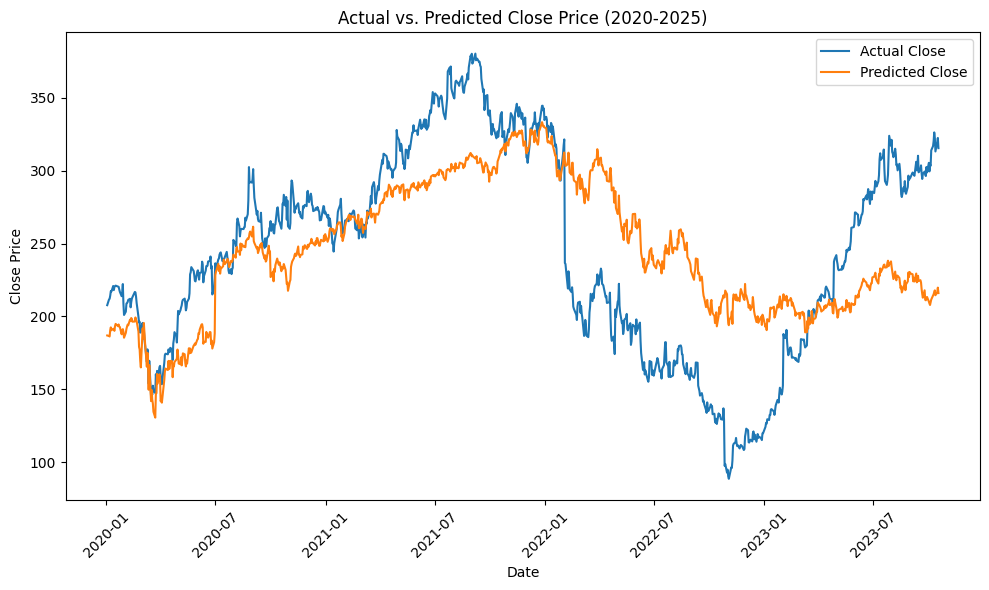

In [78]:
# Plot the actual and predicted values from 2020 to 2025
plt.figure(figsize=(10, 6))

# Filter the data for the specified period
plot_df = train_predictions[(train_predictions['Date'] >= '2020-01-01') & (train_predictions['Date'] <= '2025-03-31')]

plt.plot(plot_df['Date'], plot_df['Close'], label='Actual Close')
plt.plot(plot_df['Date'], plot_df['Predicted_Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price (2020-2025)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
y_test_pred = results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

test_predictions = test_df[['Date', 'Close']].copy()
test_predictions['Predicted_Close'] = y_test_pred.values

print("Test Predictions:")
print(test_predictions.head())

Test Predictions:
          Date       Close  Predicted_Close
956 2023-10-19  311.342621       208.861434
957 2023-10-20  307.202148       209.720138
958 2023-10-23  312.537048       204.978744
959 2023-10-24  311.083832       209.334156
960 2023-10-25  298.124939       206.282866


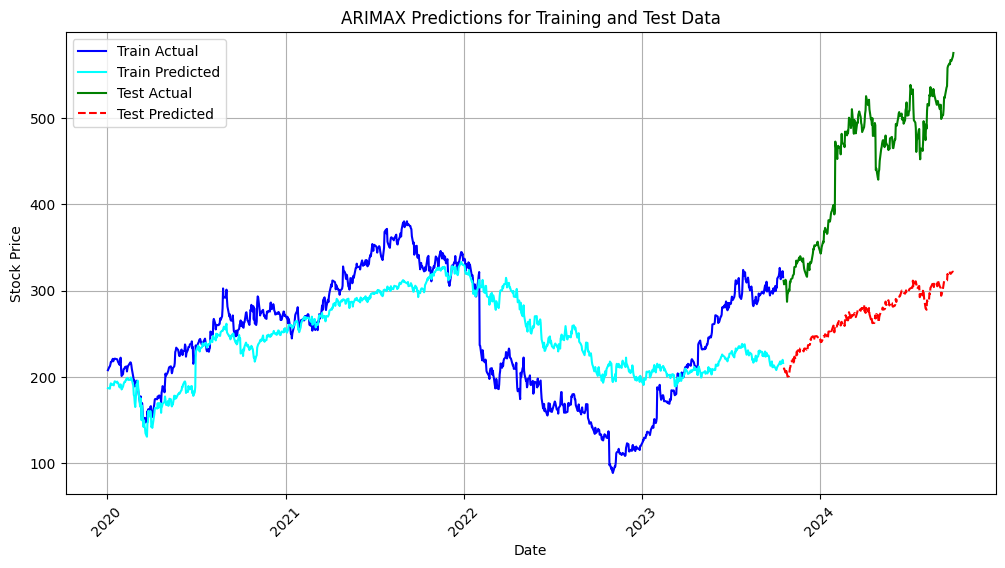

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot training actual vs predicted
plt.plot(train_predictions['Date'], train_predictions['Close'], label="Train Actual", color='blue')
plt.plot(train_predictions['Date'], train_predictions['Predicted_Close'], label="Train Predicted", color='cyan')

# Plot test actual vs predicted
plt.plot(test_predictions['Date'], test_predictions['Close'], label="Test Actual", color='green')
plt.plot(test_predictions['Date'], test_predictions['Predicted_Close'], label="Test Predicted", color='red', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("ARIMAX Predictions for Training and Test Data")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Test Metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Train MAE: {mae_train:.4f}, Train RMSE: {rmse_train:.4f}, Train R²: {r2_train:.4f}")
print(f"Test MAE: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}, Test R²: {r2_test:.4f}")

Train MAE: 43.8644, Train RMSE: 53.5600, Train R²: 0.4146
Test MAE: 177.8484, Test RMSE: 184.9304, Test R²: -4.8343


In [82]:
merged_df.corr()['Close']

,Close
Date,0.488390
Close,1.000000
High,0.999493
Low,0.999526
Open,0.998846
Volume,-0.404980
Close_diff,0.074786
SP500_GSPC,0.772724
Interest_Rate,0.340425
Advertising_Spending,-0.040073


In [83]:
# Add 1-period lagged features
merged_df['GDP_Growth_lag1'] = merged_df['GDP_Growth'].shift(1)
merged_df['Advertising_Spending_lag1'] = merged_df['Advertising_Spending'].shift(1)

In [84]:
merged_df.dropna(inplace=True)

In [85]:
y = merged_df['Close']
X = merged_df[['SP500_GSPC', 'Interest_Rate', 'GDP_Growth_lag1', 'Advertising_Spending_lag1']]

In [86]:
split_index = int(len(merged_df) * 0.8)
y_train, y_test = y[:split_index], y[split_index:]
X_train, X_test = X[:split_index], X[split_index:]

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y_train, exog=X_train, order=(0, 0, 0))
results = model.fit(disp=False)
# Print the summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  954
Model:                        SARIMAX   Log Likelihood               -5153.002
Date:                Tue, 08 Apr 2025   AIC                          10316.004
Time:                        14:41:29   BIC                          10340.307
Sample:                             0   HQIC                         10325.262
                                - 954                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
SP500_GSPC                    0.0684      0.001     51.945      0.000       0.066       0.071
Interest_Rate               -15.2936      0.947    -16.155      0.000     -17.149     

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# -------------------------
# Predictions
# -------------------------
# Predict on training set
y_train_pred = results.predict(start=0, end=len(y_train)-1, exog=X_train)

# Predict on test set
y_test_pred = results.predict(start=len(y_train), end=len(y)-1, exog=X_test)

# -------------------------
# Train Metrics
# -------------------------
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# -------------------------
# Test Metrics
# -------------------------
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# -------------------------
# Print
# -------------------------
print("✅ Train Set Evaluation")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R² Score: {r2_train:.4f}")

print("\n✅ Test Set Evaluation")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R² Score: {r2_test:.4f}")

✅ Train Set Evaluation
Train MAE: 43.78
Train RMSE: 53.65
Train R² Score: 0.4130

✅ Test Set Evaluation
Test MAE: 181.94
Test RMSE: 189.17
Test R² Score: -5.1046


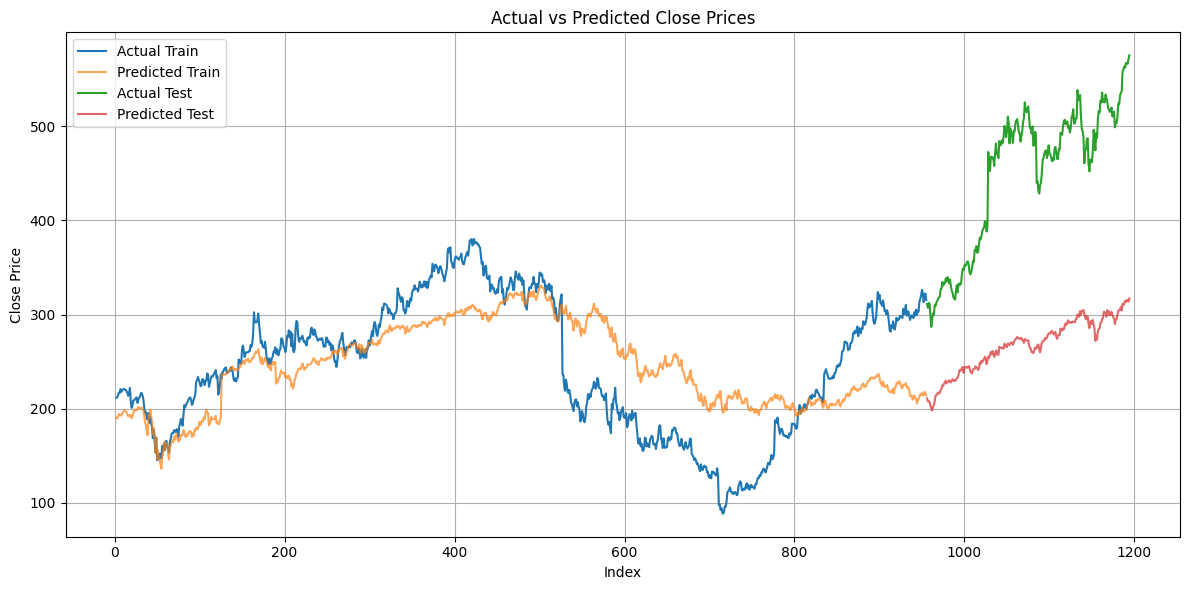

In [89]:
import matplotlib.pyplot as plt

# Plot train predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Actual Train')
plt.plot(y_train.index, y_train_pred, label='Predicted Train', alpha=0.7)

# Plot test predictions
plt.plot(y_test.index, y_test, label='Actual Test')
plt.plot(y_test.index, y_test_pred, label='Predicted Test', alpha=0.7)

plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Define ranges for p, d, q
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Store results
results_list = []

warnings.filterwarnings("ignore")  # avoid printing warnings

for param in pdq:
    try:
        model = SARIMAX(y_train, exog=X_train, order=param, enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        results_list.append({
            'order': param,
            'AIC': result.aic,
            'BIC': result.bic
        })
    except:
        continue

# Convert results to DataFrame
import pandas as pd
tuning_results = pd.DataFrame(results_list)
best_model = tuning_results.sort_values('AIC').iloc[0]
print("Best Parameters based on AIC:")
print(best_model)

Best Parameters based on AIC:
order      (0, 1, 2)
AIC      5862.441205
BIC      5896.436439
Name: 5, dtype: object


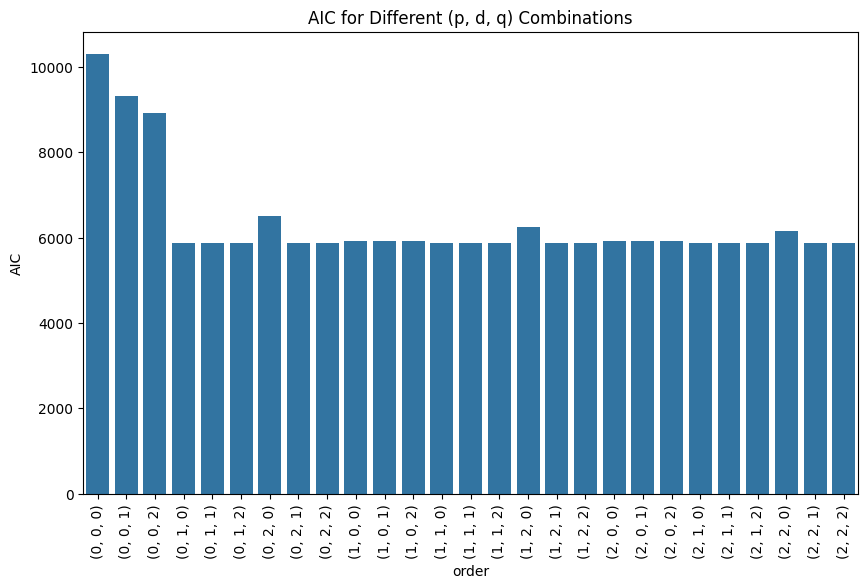

In [91]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=tuning_results['order'].astype(str), y=tuning_results['AIC'])
plt.xticks(rotation=90)
plt.title('AIC for Different (p, d, q) Combinations')
plt.show()

In [92]:
best_p, best_d, best_q = best_model['order']
model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q))
results = model.fit()

# Print the summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  954
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2932.034
Date:                Tue, 08 Apr 2025   AIC                           5878.069
Time:                        14:42:30   BIC                           5912.086
Sample:                             0   HQIC                          5891.028
                                - 954                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
SP500_GSPC                    0.0805      0.004     20.653      0.000       0.073       0.088
Interest_Rate                 3.4440      3.787      0.910      0.363      -3.978     

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# -------------------------
# Predictions
# -------------------------
# Predict on training set
y_train_pred = results.predict(start=0, end=len(y_train)-1, exog=X_train)

# Predict on test set
y_test_pred = results.predict(start=len(y_train), end=len(y)-1, exog=X_test)

# -------------------------
# Train Metrics
# -------------------------
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# -------------------------
# Test Metrics
# -------------------------
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# -------------------------
# Print
# -------------------------
print("✅ Train Set Evaluation")
print(f"Train MAE: {mae_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R² Score: {r2_train:.4f}")

print("\n✅ Test Set Evaluation")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R² Score: {r2_test:.4f}")

✅ Train Set Evaluation
Train MAE: 3.38
Train RMSE: 5.54
Train R² Score: 0.9937

✅ Test Set Evaluation
Test MAE: 72.12
Test RMSE: 84.98
Test R² Score: -0.2320


In [94]:
best_p, best_d, best_q = best_model['order']
model = SARIMAX(y_test, exog=X_test, order=(best_p, best_d, best_q))
results = model.fit()

# Print the summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  239
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -850.359
Date:                Tue, 08 Apr 2025   AIC                           1714.718
Time:                        14:42:31   BIC                           1739.024
Sample:                             0   HQIC                          1724.514
                                - 239                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
SP500_GSPC                    0.1407      0.014      9.770      0.000       0.112       0.169
Interest_Rate               -39.8971    613.842     -0.065      0.948   -1243.005    1

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Target variable
y = merged_df['Close']

# Exogenous features (ensure the column names are correct)
X = merged_df[['Interest_Rate', 'SP500_GSPC', 'Advertising_Spending', 'GDP_Growth', 'User_Growth']]

merged_df["Date"] = pd.to_datetime(df["Date"])
merged_df = merged_df.set_index("Date")

# 🧪 Train-test split (e.g., 80/20)
split_index = int(len(y) * 0.8)
y_train, y_test = y[:split_index], y[split_index:]
X_train, X_test = X[:split_index], X[split_index:]

# Scale exogenous features (StandardScaler: mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SARIMAX Model (change order (p,d,q) as needed)
model = SARIMAX(y_train, exog=X_train_scaled, order=(1, 1, 1))
results = model.fit()

# 🔮 Predictions
y_train_pred = results.predict(start=0, end=len(y_train)-1, exog=X_train_scaled)
y_test_pred = results.predict(start=len(y_train), end=len(y)-1, exog=X_test_scaled)

# Evaluation
def evaluate(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} Evaluation")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}\n")

evaluate(y_train, y_train_pred, "Train Set")
evaluate(y_test, y_test_pred, "Test Set")

Train Set Evaluation
MAE: 3.62
RMSE: 10.12
R² Score: 0.9791

Test Set Evaluation
MAE: 71.89
RMSE: 84.72
R² Score: -0.2243



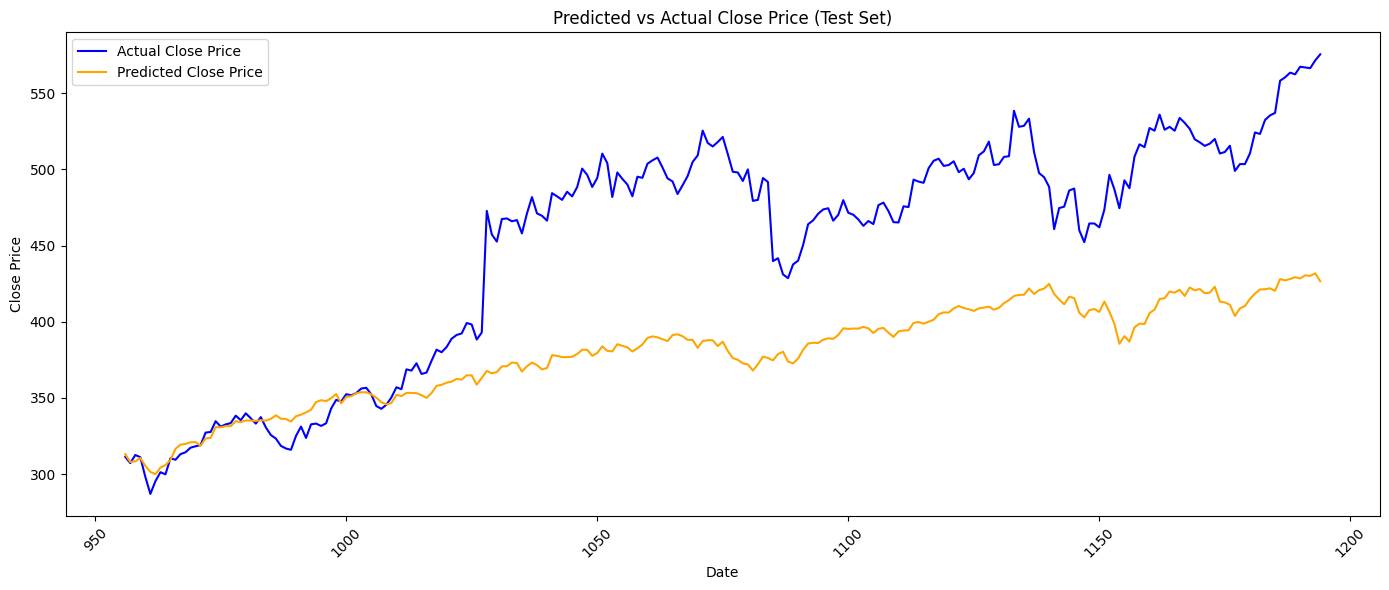

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Close Price', color='orange')
plt.title("Predicted vs Actual Close Price (Test Set)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()